In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
plt.style.use("ggplot")

### Load Data

In [2]:
df = pd.read_csv('data\\review_classification.csv', encoding = "utf-8", usecols = ['business_id','user_id','stars'])
df.head()

,business_id,stars,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,5,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,5,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,5,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,3,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,5,-Z7Nw2UF7NiBSAzfXNA_XA


### Clean and Analyze Data

In [3]:
# stars distribution
df['stars'].value_counts()

5    278772
4    123321
1     74337
3     63377
2     47120
Name: stars, dtype: int64

In [4]:
# number of unique business_id
print('number of unique business_id: ',df['business_id'].nunique()) 
# number of unique user_id
print('number of unique user_id: ',df['user_id'].nunique())

number of unique business_id:  3958
number of unique user_id:  262322


In [5]:
# number of comments made by each user
user_review_count = df['user_id'].value_counts()
user_review_count.head()

bLbSNkLggFnqwNNzzq-Ijw    664
JaqcCU3nxReTW2cBLHounA    347
PKEzKWv_FktMm2mGPjwd0Q    273
U4INQZOPSUaj8hMjLlZ3KA    227
qPVtjjp8sNQ32p9860SR9Q    212
Name: user_id, dtype: int64

<function matplotlib.pyplot.show>

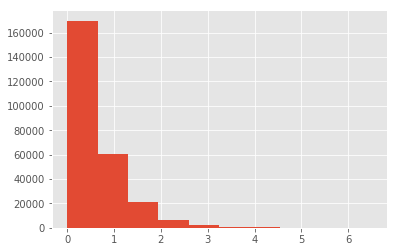

In [6]:
# display log histogram
user_review_count.apply(np.log).hist()
plt.show

In [7]:
# Exclude users that haven't given many reviews (will become noise when computing item-item similarity)
# take users that has made more than 5 reviews
df_users = user_review_count[user_review_count > 5]
# count how many users
print('Number of users who made more than 5 reiews: ',df_users.count())
# count how many reviews
print('Number of reviews: ',df_users.sum())
df_users.head()

Number of users who made more than 5 reiews:  16381
Number of reviews:  210114


bLbSNkLggFnqwNNzzq-Ijw    664
JaqcCU3nxReTW2cBLHounA    347
PKEzKWv_FktMm2mGPjwd0Q    273
U4INQZOPSUaj8hMjLlZ3KA    227
qPVtjjp8sNQ32p9860SR9Q    212
Name: user_id, dtype: int64

In [8]:
# filter the data frame with selected users
df = df.set_index('user_id').ix[df_users.index].reset_index()
df.head()

C:\Users\yle\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
1,bLbSNkLggFnqwNNzzq-Ijw,-FcZY7a7qgxTUlTvwuyJnQ,3
2,bLbSNkLggFnqwNNzzq-Ijw,-IWsoxH7mLJTTpU5MmWY4w,4
3,bLbSNkLggFnqwNNzzq-Ijw,-NjZ5HZApXjRJaTVZeSO_w,4
4,bLbSNkLggFnqwNNzzq-Ijw,-RJ216TTIghZshCkUlD1WQ,4


### Create Utility Martrix

In [9]:
df_utility = pd.pivot_table(data = df,
                            values = 'stars', # fill with stars
                            index = 'user_id', # rows
                            columns = 'business_id', # columns
                            fill_value = 0) # fill missings                  

In [14]:
print(df_utility.shape)
df_utility.head()

(16381, 3848)


business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-Bf8BQ3yMk8U2f45r2DRKw,-Bv-HHUs8aHzDrdWcZHn8w,-CQokjildrY7UZezXCdEBw,...,zjvnqTjBp56NhMp1GrlO5g,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zr42_UsWfaIF-rcp37OpwA,zsQk990PubOHjr1YcLkQFw,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg,zx_j6OuuHHa2afVoAZuLpA
user_id,,,,,,,,,,,,,,,,,,,,,
--LUapetRSkZpFZ2d-MXLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--RlSfc-QmcHFGHyX6aVjA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
-00kdEIhCt-ODaV4BS-EAg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-05XqtNjcBq19vh2CVJN8g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build Recommender System

In [15]:
import graphlab

ModuleNotFoundError: No module named 'graphlab'